### Sveučilište u Zagrebu
### Fakultet organizacije i informatike
### Varaždin

# Analaiza podataka o kreditu

#### Projekt
### Programiranje za analizu podataka 
#### Fran Gabaldo
Varaždin, 2024.

## Sadržaj
1. Uvod
2. Implemetnacija i prikaz rada aplikacije
3. Kritički osvrt
4. Zaključak
5. Literatura

## Uvod

Razmišljajući o mogućim temama za ovaj projekt, pokušavao sam pronaći ravnotežu između zahtjevnosti projekta, kvalitete podataka koji se koriste, te zanimljivosti same teme. Budući da sam u ovom semestru upisao izborni kolegij Financijska matematika, počeo sam pokazivati više interesa za upravljanje novcem u današnjem društvu, što me dovelo do kredita. Tema mi se činila dovoljno kompleksnom da bi se mogla prikazati s pomoću svih tehnologija i alata koje smo koristili na ovom kolegiju, kao što su uvoz podataka iz različitih datoteka uz pomoć pandas-a, spremanje tih podataka unutar neke baze podataka u Pythonu, kreiranje REST API-ja za pristup podacima itd. Tema je uz to i poprilično aktualna, budući da su krediti nešto s čim ćemo se u životu svi susretati ako već do sad nismo. Cilj projekta je uzeti nešto aktualno i korisno, kao što su podaci o kreditima i korisnicima istih, te prikazati kako se s tim podacima može služiti i kako ih analizirati uz pomoć tehnologija obrađivanih na ovom kolegiju.

## Implementacija i prikaz rada aplikacije

Na samom početku uvoze se biblioteke koje su najčešće korištene za ovakav tip analize. To su pandas, uz pomoć kojega se mogu uvoziti podaci iz različitih datoteka, spremati u DataFrame nad kojim je moguće izvršavati razne operacije, te mnoge druge korisne metode. Uz njega se uvozi biblioteka numpy koja se koristi za numeričke i matematičke operacije, matrice i slično. Za potrebe vizualne analize podataka uvoze se seaborn i matplotlib, koji se koriste za crtanje raznih grafova te prikazivanje distribucija podataka. Podatci se uvoze iz dvije datoteke preuzete sa generatedata.com [1], od kojih je jedna u csv, a druga u json formatu, te ih uvozimo uz pomoć pandas metoda *read_csv* i *read_json*. Tako se dobiju dva DataFrame-a, sa podacima o imenu i prezimenu osobe, telefonskim brojem, adresom, poštanskim brojem, regijom, državom, brojem godina na koje je podignut kredit, te iznos samog kredita prikazan u eurima. Kako bi se ovim podacima moglo efikasno baratati, potrebno ih je spojiti u jedan veliki DataFrame sa svim osobama i kreditima, što je učinjeno metodom *concat* [2] Na samom kraju uz pomoć funkcije strip uklonjen je znak valute euro iz stupca *iznos_kredita*, kako bi se taj stupac kasnije mogao prebaciti u tip podataka integer te koristiti za obradu.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

csv_df = pd.read_csv('credit_data.csv')
csv_df

,ime_prezime,telefon,adresa,postanski_broj,regija,drzava,broj_godina,iznos_kredita
0,Neville Böhm,0845 46 47,"P.O. Box 858, 8604 Nec St.",2454,Wien,Austria,2,€17677
1,Samson Haanraads,0800 562 5401,437-5257 Urna Av.,8655 ID,Overijssel,Netherlands,2,€33637
2,Eagan Schuster,0882 656 6113,"P.O. Box 225, 6791 Nulla Avenue",4302 UE,Friesland,Netherlands,19,€15631
3,Kane Holt,07885 471655,"361-3658 Eget, Rd.",50175,SL,Germany,5,€46960
4,Raphael Eikenboom,0500 134949,Ap #555-6564 Pharetra. Avenue,06865,BB,Germany,13,€13975
...,...,...,...,...,...,...,...,...
95,Chaim Arends,056 2453 3903,"Ap #484-9700 Laoreet, Road",5412 QI,Flevoland,Netherlands,15,€34073
96,Anthony Prinsen,056 2705 5187,"P.O. Box 649, 2019 Arcu. Av.",6591 FE,Zl,Netherlands,19,€14612
97,Ocean Wimmer,(01054) 61065,984-2639 Vitae Ave,8837,AN,Belgium,17,€33032
98,Tana Mertens,0800 678216,8261 Mus. Avenue,8288,HE,Belgium,14,€39519


In [4]:
json_df = pd.read_json('json_credit.json')
json_df

,ime_prezime,telefon,adresa,postanski_broj,regija,drzava,broj_godina,iznos_kredita
0,Norman Schumann,(016977) 8593,668-4898 Proin Rd.,7266,Styria,Austria,13,€22445
1,Latifah Fischer,(0116) 401 2714,Ap #987-2495 Donec St.,7764 QV,Flevoland,Netherlands,2,€14152
2,Kirsten Möller,0800 1111,"P.O. Box 347, 9792 Lorem. Ave",2049,Vienna,Austria,2,€6552
3,Myra Rietveld,0946 096 9873,285-7754 Sem St.,4711,Brussels Hoofdstedelijk Gewest,Belgium,4,€34916
4,Flynn Peters,076 8333 1789,Ap #686-6207 Dui Av.,62333,Hessen,Germany,6,€31068
...,...,...,...,...,...,...,...,...
95,Inez Pfeifer,055 0327 4946,Ap #747-7941 Pharetra. Ave,5412,Luik,Belgium,9,€9317
96,Isabelle Gagneux,056 9232 4345,"3304 Rutrum, Avenue",6375,Brussels Hoofdstedelijk Gewest,Belgium,5,€47786
97,Buffy Fontaine,(01633) 72851,908-6905 Sit Ave,3799,Brussels Hoofdstedelijk Gewest,Belgium,3,€9861
98,Stewart Poirier,(01410) 425913,"P.O. Box 256, 9392 Ipsum St.",3779,Upper Austria,Austria,15,€30660


In [5]:
indexes = [d for d in range(100,200)]
json_df.index = indexes
json_df

,ime_prezime,telefon,adresa,postanski_broj,regija,drzava,broj_godina,iznos_kredita
100,Norman Schumann,(016977) 8593,668-4898 Proin Rd.,7266,Styria,Austria,13,€22445
101,Latifah Fischer,(0116) 401 2714,Ap #987-2495 Donec St.,7764 QV,Flevoland,Netherlands,2,€14152
102,Kirsten Möller,0800 1111,"P.O. Box 347, 9792 Lorem. Ave",2049,Vienna,Austria,2,€6552
103,Myra Rietveld,0946 096 9873,285-7754 Sem St.,4711,Brussels Hoofdstedelijk Gewest,Belgium,4,€34916
104,Flynn Peters,076 8333 1789,Ap #686-6207 Dui Av.,62333,Hessen,Germany,6,€31068
...,...,...,...,...,...,...,...,...
195,Inez Pfeifer,055 0327 4946,Ap #747-7941 Pharetra. Ave,5412,Luik,Belgium,9,€9317
196,Isabelle Gagneux,056 9232 4345,"3304 Rutrum, Avenue",6375,Brussels Hoofdstedelijk Gewest,Belgium,5,€47786
197,Buffy Fontaine,(01633) 72851,908-6905 Sit Ave,3799,Brussels Hoofdstedelijk Gewest,Belgium,3,€9861
198,Stewart Poirier,(01410) 425913,"P.O. Box 256, 9392 Ipsum St.",3779,Upper Austria,Austria,15,€30660


In [6]:
dataFrames = [csv_df, json_df]
df_kredit = pd.concat(dataFrames)
df_kredit

,ime_prezime,telefon,adresa,postanski_broj,regija,drzava,broj_godina,iznos_kredita
0,Neville Böhm,0845 46 47,"P.O. Box 858, 8604 Nec St.",2454,Wien,Austria,2,€17677
1,Samson Haanraads,0800 562 5401,437-5257 Urna Av.,8655 ID,Overijssel,Netherlands,2,€33637
2,Eagan Schuster,0882 656 6113,"P.O. Box 225, 6791 Nulla Avenue",4302 UE,Friesland,Netherlands,19,€15631
3,Kane Holt,07885 471655,"361-3658 Eget, Rd.",50175,SL,Germany,5,€46960
4,Raphael Eikenboom,0500 134949,Ap #555-6564 Pharetra. Avenue,06865,BB,Germany,13,€13975
...,...,...,...,...,...,...,...,...
195,Inez Pfeifer,055 0327 4946,Ap #747-7941 Pharetra. Ave,5412,Luik,Belgium,9,€9317
196,Isabelle Gagneux,056 9232 4345,"3304 Rutrum, Avenue",6375,Brussels Hoofdstedelijk Gewest,Belgium,5,€47786
197,Buffy Fontaine,(01633) 72851,908-6905 Sit Ave,3799,Brussels Hoofdstedelijk Gewest,Belgium,3,€9861
198,Stewart Poirier,(01410) 425913,"P.O. Box 256, 9392 Ipsum St.",3779,Upper Austria,Austria,15,€30660


In [7]:
df_kredit['iznos_kredita'] = df_kredit['iznos_kredita'].str.strip('€')
df_kredit

,ime_prezime,telefon,adresa,postanski_broj,regija,drzava,broj_godina,iznos_kredita
0,Neville Böhm,0845 46 47,"P.O. Box 858, 8604 Nec St.",2454,Wien,Austria,2,17677
1,Samson Haanraads,0800 562 5401,437-5257 Urna Av.,8655 ID,Overijssel,Netherlands,2,33637
2,Eagan Schuster,0882 656 6113,"P.O. Box 225, 6791 Nulla Avenue",4302 UE,Friesland,Netherlands,19,15631
3,Kane Holt,07885 471655,"361-3658 Eget, Rd.",50175,SL,Germany,5,46960
4,Raphael Eikenboom,0500 134949,Ap #555-6564 Pharetra. Avenue,06865,BB,Germany,13,13975
...,...,...,...,...,...,...,...,...
195,Inez Pfeifer,055 0327 4946,Ap #747-7941 Pharetra. Ave,5412,Luik,Belgium,9,9317
196,Isabelle Gagneux,056 9232 4345,"3304 Rutrum, Avenue",6375,Brussels Hoofdstedelijk Gewest,Belgium,5,47786
197,Buffy Fontaine,(01633) 72851,908-6905 Sit Ave,3799,Brussels Hoofdstedelijk Gewest,Belgium,3,9861
198,Stewart Poirier,(01410) 425913,"P.O. Box 256, 9392 Ipsum St.",3779,Upper Austria,Austria,15,30660


### Baza podataka

Podaci su sada oblikovani i spremni za obradu, no prije toga bi ih bilo pametno spremiti unutar neke baze podataka. U tu svrhu uvozi se biblioteka sqlalchemy, koja donosi mnoge potrebne alate za kreiranje tablica, izvršavanje sql naredbi i druge stvari. Unutar varijable *engine* kreira se *engine* baze podataka koji se sprema u privremenu memoriju. Unutar varijable *metadata* spremaju se metapodaci, kao što su imena tablica, tipovi stupaca i slično. Zatim se kreira tablica naziva *kredit*, koja sadrži stupac za svaki podatak o korisniku koji je naveden u prethodnom dijelu, te se uz njih definira tip podataka, koji je *string* za sve stupce osim broja godina kredita i iznosa kredita, koji su tip podataka *integer*. Bitno je napomenuti stupac *id* koji se koristi kao primarni ključ unutar tablice. Pozivom metode *create_all* tablica kredit se kreira unutar baze podataka. U idućem bloku koda provodi se postupak spremanja svih podataka iz DataFrame-a koji je kreiran u bazu podataka unutar tablice kredit. To se provodi uz pomoć for petlje kojom se prolazi kroz svaki redak DataFrame-a, te se uz pomoć *iloc* metode svaki podatak koji imamo o osobi sprema unutar varijable *insert_stmt*, te se zatim ta varijabla prosljeđuje metodi *execute* koja izvršava tu naredbu te sprema taj redak unutar baze podataka. Taj postupak se ponavlja za svaki redak, odnosno osobu koja postoji unutar tablice. Zatim se pristupa tablici koja je napunjena podacima metodom *select*, te se ponovno poziva *execute*, i time se ispisuje svaki redak unutar baze podataka, čime je moguće vidjeti sve što je upravo spremljeno u nju.

In [42]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, insert, select

engine = create_engine('sqlite:///:memory:')

metadata = MetaData()

kredit = Table('kredit', metadata,
               Column('id', Integer, primary_key=True),
               Column('ime_prezime', String),
               Column('telefon', String),
               Column('adresa', String),
               Column('postanski_broj', String),
               Column('regija', String),
               Column('drzava', String),
               Column('broj_godina', Integer),
               Column('iznos_kredita', Integer))

metadata.create_all(engine)

In [43]:
for i in range(0,200):
    insert_stmt = insert(kredit).values(ime_prezime=f'{df_kredit.iloc[i, 0]}',
                                        telefon=f'{df_kredit.iloc[i, 1]}',
                                        adresa=f'{df_kredit.iloc[i, 2]}',
                                        postanski_broj=f'{df_kredit.iloc[i, 3]}',
                                        regija=f'{df_kredit.iloc[i, 4]}',
                                        drzava=f'{df_kredit.iloc[i, 5]}',
                                        broj_godina=f'{df_kredit.iloc[i, 6]}',
                                        iznos_kredita=f'{df_kredit.iloc[i, 7]}')
    
    with engine.connect() as conn:
        conn.execute(insert_stmt)
        
select_stmt = select(kredit)

with engine.connect() as conn:
    result = conn.execute(select_stmt)
    for row in result:
        print(row)

(1, 'Lani van Vliet', '(086) 17738678', 'P.O. Box 357, 3049 Tristique Street', '2380', 'Salzburg', 'Austria', 12, '19,019')
(2, 'Nero van Rooijen', '(030) 12713532', '113-1569 Phasellus Ave', '24757', 'Bremen', 'Germany', 6, '48,614')
(3, 'Eugenia Arts', '(02564) 1687093', 'Ap #945-9634 Sed St.', '5847 XW', 'Waals-Brabant', 'Belgium', 19, '40,888')
(4, 'Quinlan Roggeveen', '(034385) 410051', '979-3263 Mauris Street', '2386 KG', 'Waals-Brabant', 'Belgium', 13, '36,278')
(5, 'Adele Schmitt', '(039580) 893864', 'Ap #529-8336 Ac, Rd.', '1556 TE', 'Flevoland', 'Netherlands', 12, '32,087')
(6, 'Brock Beaulieu', '(0691) 36928921', 'Ap #502-8450 Natoque Ave', '1132', 'Utrecht', 'Netherlands', 13, '48,460')
(7, 'Cairo Segal', '(03531) 7723595', '220-7926 Magna St.', '1486 BB', 'Vorarlberg', 'Austria', 10, '8,906')
(8, 'Norman Van Der Aart', '(0423) 35868384', '598 Amet, Avenue', '5818 ZX', 'Berlin', 'Germany', 5, '25,031')
(9, 'Paula Lachapelle', '(031541) 427618', 'P.O. Box 288, 6892 Nibh Rd.'

### API

U ovom dijelu fokus je na izradi sučelja za pristup podacima koji su maloprije spremljeni u bazu podataka. U ovom projektu to je odrađeno preko REST API-ja. Prvo se DataFrame koji je do sad korišten sprema u csv datoteku *kredit.csv*, kako bi ti podaci kasnije mogli biti učitani u sučelje. Prvo je potrebno uspostaviti ssh tunel, što se čini pomoću servisa ngrok, koji je korišten u sklopu kolegija. Uvozi se biblioteka *pyngrok*, te se od korisnika traži da unese autentifikacijski token dobiven od servisa ngrok. U idućoj liniji kreira se ngrok tunel na portu 22, koji je tipa tcp [4]. Zatim se izvlači  ssh url iz *connection_string-a*, te se ispisuje poruka korisniku da je ssh tunel dostupan. Nakon toga u idućem bloku koda se kreira jednostavni FLASK API za pristup podacima. Uvoze se biblioteke *os* za fukcionalnosti operativnog sustava, *threading* kojim predstavlja modul za pokretanje Flask-a u zasebnoj dretvi, *json* i *csv* za korištenje json-a i csv-a, te Flask i ngrok, kako bi se mogao napraviti API. Zatim se kreira Flask aplikacija, te se port na kojem će se ona izvršavati postavlja na 5000. Kreira se ngrok tunel za aplikaciju na tom portu, te se uzima javni url za korištenje aplikacije. Koristi se *config* kako bi se javni url spremio unutar konfiguracije aplikacije. Kreira se funkcija *load_data* koja čita csv datoteku i vraća ju kao listu riječnika(dictionary). U idućem dijelu koda konfiguriraju se rute kojima se pristupa određenim dijelovima aplikacije. Za rutu */krediti* uz pomoć GET metode se dohvaća cijeli sadržaj učitane csv datoteke, te se ispisuje u json formatu. Pomoću putanje /kredit/<id_kredit> dohvaća se specifični redak prema id-ju unutar putanje, koji se prosljeđuje funkciji koja dohvaća redak ako je id jednak prosljeđenom. Zatim se aplikacija pokreće, i to uz pomoć zasebne dretve, tako da ngrok tunel ostane aktivan. Na kraju se u konzolu ispisuje url koji vodi do aplikacije.

In [6]:
df_kredit.to_csv('kredit.csv', index_label='id_kredit')

In [10]:
from pyngrok import ngrok, conf

conf.get_default().auth_token = input('Unesite autentifikacijski token: ')

connection_string = ngrok.connect('22', 'tcp').public_url

ssh_url, port = connection_string.strip('tcp://').split(':')
print(f' * ngrok tunel dostupan, pristup: ssh root@{ssh_url} -p{port}')

Unesite autentifikacijski token:  2alnDEBG9p9rX0pQM3CIqZJOANK_3i8zVaYMLjZsHsZ9rcvrt


 * ngrok tunel dostupan, pristup: ssh root@0.tcp.ngrok.io -p15953


In [12]:
import os
import threading
import json
import csv
from flask import Flask, jsonify, request
from pyngrok import ngrok

app = Flask(__name__)
port = "5000"

public_url = ngrok.connect(port).public_url
print(" * ngrok tunel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))
app.config["BASE_URL"] = public_url

def load_data():
    with open('kredit.csv', 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        return list(reader)
    
krediti = load_data()

@app.route('/')
def index():
    return 'Projektni API, unesite /krediti za prikaz svih redaka tablice, unesite /kredit/<id_kredit> da bi preko id-ja pristupili odrređenom retku tablice'

@app.route('/krediti', methods=['GET'])
def get_credits():
    return jsonify(krediti)

@app.route('/kredit/<id_kredit>', methods=['GET'])
def get_credit(id_kredit):
    kredit = next((k for k in krediti if k['id_kredit'] == id_kredit), None)
    return jsonify(kredit) if kredit else ('', 404)

threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * ngrok tunel "https://a78b-193-198-27-58.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Jan/2024 16:57:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jan/2024 16:57:35] "GET / HTTP/1.1" 200 -
t=2024-01-10T16:57:50+0100 lvl=warn msg="Stopping forwarder" name=tcp-22-3ace3121-7351-4a1e-8b5b-f1112a1b6d7b acceptErr="failed to accept connection: Listener closed"
t=2024-01-10T16:57:50+0100 lvl=warn msg="Stopping forwarder" name=http-5000-1cde805a-daa4-47bb-9cf7-62937c325767 acceptErr="failed to accept connection: Listener closed"
t=2024-01-10T16:57:50+0100 lvl=warn msg="Stopping forwarder" name=http-5000-e477066e-5a37-45c1-b687-7b2033f73539 acceptErr="failed to accept connection: Listener closed"
t=2024-01-10T16:57:50+0100 lvl=warn msg="Error restarting forwarder" name=http-5000-1cde805a-daa4-47bb-9cf7-62937c325767 err="failed to start tunnel: session closed"
t=2024-01-10T16:57:50+0100 lvl=warn msg="Error restarting forwarder" name=tcp-22-3ace3121-7351-4a1e-8b5b-f1112a1b6d7b err="failed to start tunnel: ses

### Analiza i vizualizacija podataka

Na samom kraju preostala je analiza i vizualizacija podataka. Pozivom metode *info* vidljivo je da je stupac *iznos_kredita* tipa podataka *object*, te ga je potrbeno pretvoriti u neki cjelobrojni tip podataka ako se želi izvršiti analiza podataka. To se čini metodom *astype*, kojoj se prosljeđuje riječnik u kojem je zapisano koji se stupac pretvara u koji tip podataka. Sada kad su podaci u ispravnom obliku, moguće je prijeći na njihovu analizu. Prvo se izdvaja 10 najvećih kredita, pomoću metode *nlargest*, a to se radi i za broj godina na koje je podignut kredit. Pomoću biblioteke seaborn crta se dijagram koji prikazuje raspodjelu visine podignutih kredita [3], te je uočljivo da je za najveći broj kredita podignuto oko €40 000. Zatim je nacrtan još jedan dijagram sličan ovom, ali po jedan za svaku državu. Odskače Austrija, kod koje je najveći broj kredita u iznosu od €10 000 i manje, dok je kod ostalih zemalja to više oko €40 000. Idući korak u analizi jest provjeriti prosjeke iznosa kredita po državama. To je učinjeno metodom *groupby* kojoj se prosljeđuje stupac *drzava*, te se još i selektira stupac *iznos_kredita* za koji se metodom *mean* računa prosjek. Na kraju se metodom *sort_values* dobiveni podaci sortiraju za prikaz. Primjetno je da najveći prosječan iznos kredita ima Njemačka, a najmanji Austrija, a zanimljivo je da usprkos tomu Njemačka ima najmanji prosjek godina na koje je podignut kredit, dok je u toj kategoriji najviša Nizozemska. U idućih nekoliko blokova koda na gotovo isti način dobivaju se prosječne vrijednosti kredita i broja godina za pojedine regije unutar države, a to se izvodi tako da se prije grupiranja iz DataFrame-a izvuku svi retci koji odgovaraju određenoj državi.

In [7]:
df_kredit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ime_prezime     200 non-null    object
 1   telefon         200 non-null    object
 2   adresa          200 non-null    object
 3   postanski_broj  200 non-null    object
 4   regija          200 non-null    object
 5   drzava          200 non-null    object
 6   broj_godina     200 non-null    int64 
 7   iznos_kredita   200 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.1+ KB


In [8]:
convert_dict = {'iznos_kredita': int}
df_kredit = df_kredit.astype(convert_dict)
df_kredit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ime_prezime     200 non-null    object
 1   telefon         200 non-null    object
 2   adresa          200 non-null    object
 3   postanski_broj  200 non-null    object
 4   regija          200 non-null    object
 5   drzava          200 non-null    object
 6   broj_godina     200 non-null    int64 
 7   iznos_kredita   200 non-null    int32 
dtypes: int32(1), int64(1), object(6)
memory usage: 13.3+ KB


In [9]:
top10 = df_kredit.nlargest(10, 'iznos_kredita')
top10[['ime_prezime', 'iznos_kredita']]

,ime_prezime,iznos_kredita
24,Ishmael Heilig,49549
112,Ingrid Geelen,49168
166,Deirdre Zwart,49042
15,Peter Janvier,48989
94,Grady Maier,48858
43,Ray Bäcker,48508
11,Garrett Raab,48006
196,Isabelle Gagneux,47786
3,Kane Holt,46960
147,Jermaine Swart,46844


In [10]:
dugi_kredit = df_kredit[df_kredit.broj_godina > 10]
dugi_kredit[['ime_prezime', 'broj_godina']].sort_values(by=['broj_godina'], ascending=False).head(10)

,ime_prezime,broj_godina
16,Carissa Binder,20
32,Lana de Haan,20
2,Eagan Schuster,19
70,Hedley Kloet,19
39,Murphy Baumgartner,19
179,Leandra Mayer,19
96,Anthony Prinsen,19
108,Cyrus Simon,19
118,Keelie Jonker,19
50,Dean Weiß,19


<Axes: xlabel='iznos_kredita', ylabel='Count'>

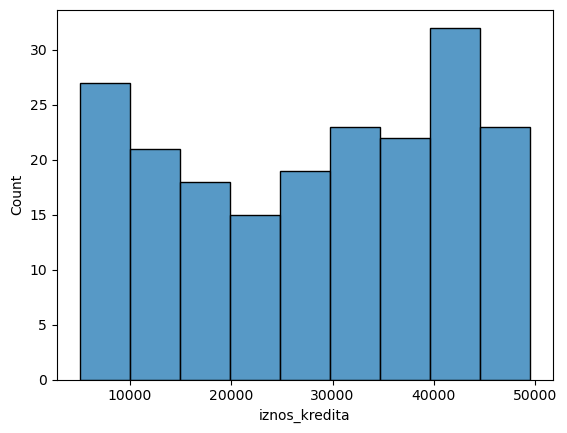

In [24]:
sns.histplot(data=df_kredit, x='iznos_kredita')

C:\Users\Fran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


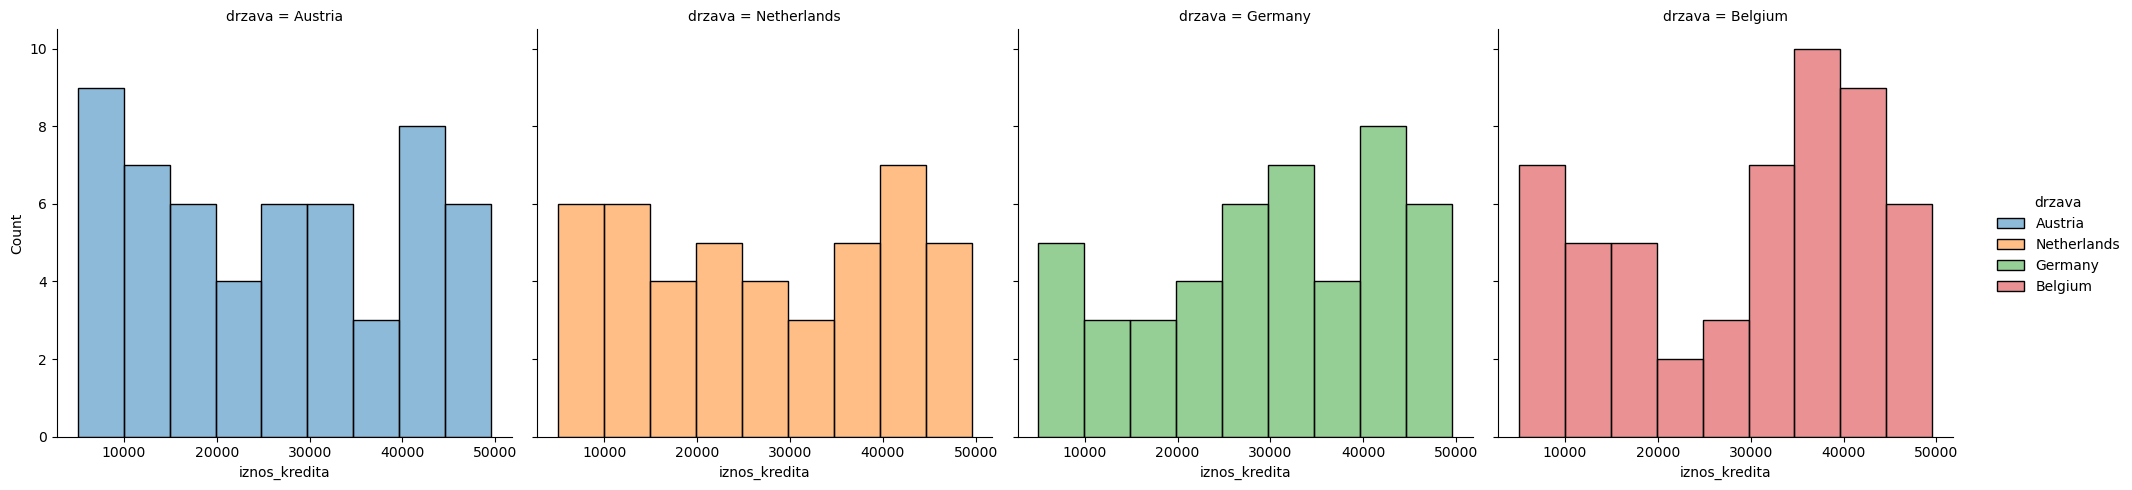

In [15]:
sns.displot(data=df_kredit, x='iznos_kredita', hue='drzava', col='drzava')

In [29]:
avg_kredit = df_kredit.groupby('drzava')['iznos_kredita'].mean()
avg_kredit = avg_kredit.sort_values(ascending=False)
avg_kredit

drzava
Germany        29853.369565
Belgium        29385.351852
Netherlands    27233.488889
Austria        26141.218182
Name: iznos_kredita, dtype: float64

In [30]:
avg_trajanje = df_kredit.groupby('drzava')['broj_godina'].mean()
avg_trajanje = avg_trajanje.sort_values(ascending=False)
avg_trajanje

drzava
Netherlands    11.977778
Belgium        10.425926
Austria        10.400000
Germany         9.195652
Name: broj_godina, dtype: float64

In [31]:
avg_kredit_germany = df_kredit[df_kredit.drzava == 'Germany'].groupby('regija')['iznos_kredita'].mean()
avg_kredit_germany = avg_kredit_germany.sort_values(ascending=False)
avg_kredit_germany

regija
SL                        45057.333333
RP                        44925.000000
HH                        44568.000000
Bayern                    41686.000000
Rheinland-Pfalz           39637.333333
Saarland                  38615.500000
Nordrhein-Westphalen      38190.333333
ST                        37316.000000
Brandenburg               31389.000000
Hamburg                   29689.200000
BW                        29592.000000
Niedersachsen             27576.000000
Berlin                    27444.000000
Mecklenburg-Vorpommern    27075.000000
Sachsen                   26584.000000
Sachsen-Anhalt            25869.333333
Hessen                    18911.000000
SH                        16278.000000
Baden Württemberg         16231.666667
BB                        13975.000000
Bremen                    13579.000000
NW                         5018.000000
Name: iznos_kredita, dtype: float64

In [33]:
avg_trajanje_germany = df_kredit[df_kredit.drzava == 'Germany'].groupby('regija')['broj_godina'].mean()
avg_trajanje_germany = avg_trajanje_germany.sort_values(ascending=False)
avg_trajanje_germany

regija
BW                        18.000000
SH                        15.000000
Nordrhein-Westphalen      13.333333
BB                        13.000000
Mecklenburg-Vorpommern    13.000000
SL                        10.333333
HH                        10.000000
Sachsen-Anhalt            10.000000
Berlin                     9.750000
Saarland                   9.750000
Rheinland-Pfalz            9.666667
Niedersachsen              9.000000
Baden Württemberg          8.000000
Sachsen                    8.000000
Hamburg                    7.000000
Bremen                     7.000000
ST                         7.000000
Brandenburg                6.000000
NW                         6.000000
Hessen                     4.500000
RP                         4.000000
Bayern                     2.000000
Name: broj_godina, dtype: float64

In [32]:
avg_kredit_austria = df_kredit[df_kredit.drzava == 'Austria'].groupby('regija')['iznos_kredita'].mean()
avg_kredit_austria = avg_kredit_austria.sort_values(ascending=False)
avg_kredit_austria

regija
Sbg.             34768.333333
NÖ.              33955.500000
Burgenland       33803.400000
Vbg.             32832.000000
Vienna           30889.125000
Ktn.             29481.000000
Lower Austria    28255.250000
Salzburg         26970.800000
Carinthia        26912.500000
Upper Austria    22469.200000
Vorarlberg       22406.666667
Styria           21057.500000
Wien             17677.000000
Stm.             17523.500000
Tyrol            17518.166667
OÖ.               9954.000000
Name: iznos_kredita, dtype: float64

In [34]:
avg_trajanje_austria = df_kredit[df_kredit.drzava == 'Austria'].groupby('regija')['broj_godina'].mean()
avg_trajanje_austria = avg_trajanje_austria.sort_values(ascending=False)
avg_trajanje_austria

regija
Vbg.             19.000000
NÖ.              18.500000
Styria           15.500000
Vorarlberg       15.000000
Upper Austria    12.000000
Ktn.             11.000000
Stm.             10.500000
Burgenland       10.200000
Carinthia        10.000000
Salzburg         10.000000
Vienna            9.625000
Tyrol             8.833333
Sbg.              6.666667
Lower Austria     5.500000
OÖ.               2.000000
Wien              2.000000
Name: broj_godina, dtype: float64

In [35]:
avg_kredit_netherlands = df_kredit[df_kredit.drzava == 'Netherlands'].groupby('regija')['iznos_kredita'].mean()
avg_kredit_netherlands = avg_kredit_netherlands.sort_values(ascending=False)
avg_kredit_netherlands

regija
Noord Brabant    46019.000000
Ov               45457.000000
Dr               45250.000000
Drenthe          40640.000000
Z.               38793.000000
Gelderland       32847.666667
N.               32636.800000
Zl               29558.000000
Friesland        28829.200000
Noord Holland    28521.000000
Zeeland          25289.666667
Limburg          24660.750000
Overijssel       19372.000000
Flevoland        19131.000000
Utrecht          16235.000000
Zuid Holland     14650.500000
U.               13526.500000
Name: iznos_kredita, dtype: float64

In [36]:
avg_trajanje_netherlands = df_kredit[df_kredit.drzava == 'Netherlands'].groupby('regija')['broj_godina'].mean()
avg_trajanje_netherlands = avg_trajanje_netherlands.sort_values(ascending=False)
avg_trajanje_netherlands

regija
Zl               19.000000
Ov               17.000000
Z.               17.000000
Dr               16.000000
Limburg          14.750000
Gelderland       14.000000
Friesland        13.000000
N.               11.600000
Noord Holland    11.000000
Zuid Holland     11.000000
U.               10.500000
Utrecht          10.000000
Flevoland         9.666667
Noord Brabant     8.000000
Zeeland           7.333333
Drenthe           7.000000
Overijssel        6.000000
Name: broj_godina, dtype: float64

In [37]:
avg_kredit_belgium = df_kredit[df_kredit.drzava == 'Belgium'].groupby('regija')['iznos_kredita'].mean()
avg_kredit_belgium = avg_kredit_belgium.sort_values(ascending=False)
avg_kredit_belgium

regija
OV                                48006.000000
WB                                43912.000000
Namen                             38702.250000
HE                                37696.500000
Waals-Brabant                     35070.250000
LX                                34585.000000
Luxemburg                         33580.333333
VB                                32408.500000
Luik                              29479.000000
AN                                27893.000000
Brussels Hoofdstedelijk Gewest    27374.400000
West-Vlaanderen                   27132.500000
Henegouwen                        27123.500000
Oost-Vlaanderen                   23636.400000
Antwerpen                         16813.200000
Vlaams-Brabant                    15824.000000
WV                                 8817.000000
Name: iznos_kredita, dtype: float64

In [38]:
avg_trajanje_belgium = df_kredit[df_kredit.drzava == 'Belgium'].groupby('regija')['broj_godina'].mean()
avg_trajanje_belgium = avg_trajanje_belgium.sort_values(ascending=False)
avg_trajanje_belgium

regija
Vlaams-Brabant                    20.000000
HE                                15.500000
Waals-Brabant                     13.500000
Oost-Vlaanderen                   13.000000
WV                                13.000000
WB                                13.000000
Luxemburg                         13.000000
AN                                12.500000
West-Vlaanderen                   10.833333
Namen                             10.500000
LX                                10.000000
Luik                               9.400000
VB                                 7.500000
Henegouwen                         7.000000
Antwerpen                          6.200000
Brussels Hoofdstedelijk Gewest     4.200000
OV                                 4.000000
Name: broj_godina, dtype: float64

## Kritički osvrt

Ideja projekta bila je prikazati uporabu svih tehnologija koje su bile obrađivane na kolegiju, uz pokoje korištenje stranog izvora radi specifičnih pojašnjenja, na domeni podataka o kreditima. Osobno sam posebnu pozornost posvetio dijelovima sa izradom API-a i interakcijom s bazom podataka, te mi je bilo zanimljivo vidjeti kako se te tehnologije mogu implementirati u Pythonu, budući da sam do sad za ta područja na fakultetu primarno koristio SQL i Javascript. Ljepota Pythona kao programskog jezika najviše se vidi baš u tim situacijama, gdje golema količina biblioteka koje su dostupne svima dolazi na vidjelo, te se potvrđuje da se u Pythonu stvarno može sve raditi. Vjerujem da je u projektu u vrlo razumljivom obliku obrađen svaki od zadanih dijelova implementacije, te da su prikazane sve bitnije funkcionalnosti i metode biblioteka koje se inače koriste u sklopu ovog kolegija. Vidim mogućnost primjene ovakvog pristupa na većim projektima sa stvarnim podacima, a prednost pristupa dakako proizlazi iz ranije navedene činjenice da su svi dijelovi, pa i oni za koje se inače koriste druge tehnologije, napravljeni u Pythonu, što omogućava veću jednostavnost i homogenost cjelokupne implementacije. 

## Zaključak

Podaci o kreditima su danas vrlo aktualni, te je samim time aktualna i tema njihove obrade i prikaza. Cilj ovog projekta bio je upravo to. Uvozom podataka sa interneta spremljenih u csv i json formatu, početnom obradom tih podataka, spremanjem tih podataka u lokalnu bazu, kreiranjem REST API sučelja za pristup tim podacima, te analizom i vizualnim prikazom tih podataka postignuti su željeni rezultai. Projekt je pokazao veliku moć programskog jezika Python i njegovu široku primjenu na raznim područjima programiranja, iako se nije previše ulazilo u dubinu i prikazalo sve mogućnosti jezika i biblioteka.

## Literatura

1. Generatedata, pristupljeno 6.1.2024. na adresi: https://generatedata.com/
2. Pandas, pristupljeno 8.1.2024. na adresi: https://pandas.pydata.org/docs/user_guide/merging.html
3. Seaborn, pristupljeno 10.1.2024. na adresi: https://seaborn.pydata.org/tutorial/function_overview.html
4. ChatGPT, pristupljeno 8.1.2024. na adresi: https://chat.openai.com/